In [ ]:
import seaborn as sns
import re
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.font_manager
%matplotlib inline

In [1004]:
#data = pd.read_csv('Master.csv')
data = pd.read_excel('Master.xlsx',sheet_name='Master',converters={'TimeFinished': str,' On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now? (1 is under-reacting and 10 is overreacting)':str,'On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively? (1 is strongly distrust and 10 is strongly trust)':str})
for col in data.columns:
    if data[col].dtype == 'O':
        data[col] = data[col].str.lstrip()
data['Datetime'] = pd.to_datetime(data.TimeFinished)
data['Day'] = data['Datetime'].dt.strftime("%b-%d")


In [ ]:
data

In [41]:
def piechart(data,col,time1=None,time2=None):    
    if (time1 is not None and time2 is not None):
        data = data[(data.Datetime >= time1) & (data.Datetime < time2)]
    series = data[col]   
    labels = ['Yes','No']
    explode = (0, 0.05)  # only "explode" the "No" slice 
    plt.rcParams.update({'font.size': 11})
    fig1, ax1 = plt.subplots()
    ax1.pie(series.value_counts(dropna=False), labels=labels, explode=explode, autopct='%1.1f%%',
            shadow=False,startangle=180, colors = ['Silver','Grey'],pctdistance=.5,labeldistance=.68)
    ax1.axis('equal')
    #csfont = {'fontname':'Calibri'}
    #plt.title(re.sub('^Yes,', 'Loved ones affected -',col + " ("+time1.strftime("%b-%d") +" to " + time2.strftime("%b-%d"))+')',**csfont)
    #direc = 'Images'
    #plt.savefig(direc+'/'+series.name+'.png')


In [62]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

#def piechart(data,col,time1=None,time2=None):    
    #if (time1 is not None and time2 is not None):
    #    data = data[(data.Datetime >= time1) & (data.Datetime < time2)]
series = data[col]   
labels = ['Yes','No']
explode = (0, 0.05)  # only "explode" the "No" slice 
plt.rcParams.update({'font.size': 11})
fig1, ax1 = plt.subplots()
ax1.pie(series.value_counts(dropna=False), labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=False,startangle=180, colors = ['Silver','Grey'],pctdistance=.5,labeldistance=.68)
ax1.axis('equal')

def animate(i):
    if (time1 is not None and time2 is not None):
        data = data[(data.Datetime >= time1) & (data.Datetime < time2)
    pullData = data
    dataArray = pullData.split('\n')
    xar = []
    yar = []
    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot.pie(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=10000)
plt.show()

SyntaxError: invalid syntax (<ipython-input-62-649c31858c9b>, line 23)

<IPython.core.display.Javascript object>


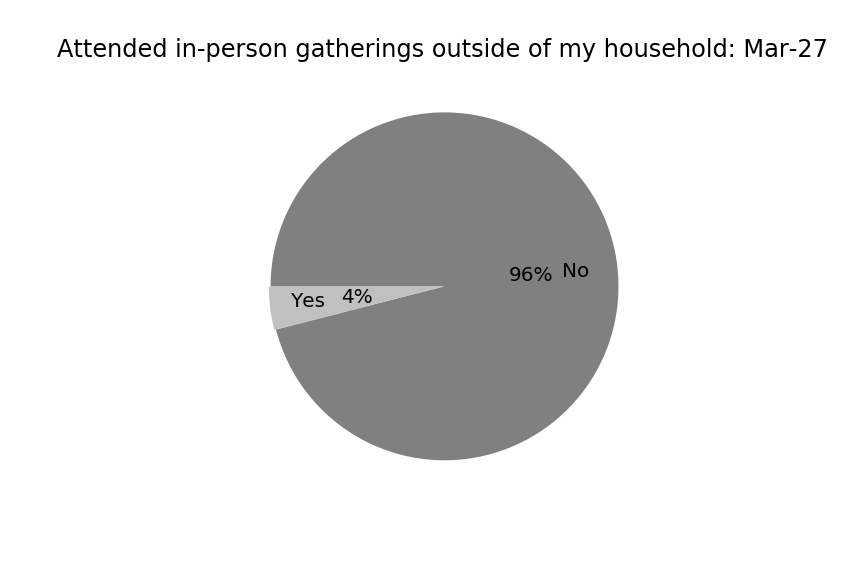

In [222]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

colors = ['Silver','Grey']
explode = (0, 0.01)
labels = ['Yes','No']
title = data[data['Unnamed: 11'].notnull()]['Unnamed: 11'].iloc[0]
data1 = data.sort_values(by=['Datetime']).reset_index()
fig, ax = plt.subplots()
def update(i):
    series = data1['Unnamed: 11'][i:i+100]
    plt.cla()
    ax.pie(series.value_counts(dropna=False).sort_values(na_position='last'), labels=labels, explode=explode, autopct='%1.f%%',shadow=False,startangle=180, colors = ['Silver','Grey'],pctdistance=.5,labeldistance=.68)
    ax.set_title(title + ': ' + data1.Datetime[i+100].strftime("%b-%d"))

ani = FuncAnimation(plt.gcf(),update,len(data)-100,interval=25,repeat=False)
plt.show()

In [1027]:
import plotly.graph_objects as go

def piechart2(data,col,income=None,age=None):
    
    
    if income is not None:
        data = data[data['income_group']==income]
        incometxt = income
    else:
        incometxt = ''
    if age is not None:       
        data = data[data['Age Groups']==age]
        agetxt = age
    else:
        agetxt = ''    
    #colors = ['Dimgrey','Darkgrey','Gainsboro','Whitesmoke','White','Black','Silver']
    series = data[col]
    title = str(series.name)
    df = series.value_counts(dropna=False,sort=True)
    if len(df) == 2:
        df = series.value_counts(dropna=False,sort=True)
        labels=['Yes','No']
        title = data[series.notnull()][col].iloc[0]
        if isinstance(df.index[1],str):
            df = df.sort_values()
    else:
        df = series.value_counts(dropna=True,sort=True)
        labels = df.index
        
        
    fig = go.Figure(data=[go.Pie(labels=labels, values=df,)])
    
    
    fig.update_traces(hoverinfo='label+value', textinfo='percent',textfont_color='black', textfont_size=20,marker=dict(line=dict(color='#000000', width=1.5)))
    title1 = age
    fig.update_layout(title=title,font=dict(family="Calibri",size=15))
    fig.write_image("images/"+title+".png")
    fig.show()

In [ ]:
#data.Day.value_counts()

data[data.Day.isin(data.Day.value_counts().index[data.Day.value_counts().gt(10)])]

In [1005]:
data['What is your employment status?'] = data['What is your employment status?'].str.capitalize() 
data['What is your gender?'] = data['What is your gender?'].str.capitalize()
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.capitalize() 
data['Age'] = 2020 - data['What year were you born?']
data['Age Groups'] = pd.cut(x=data['Age'], bins=[0, 24, 39, 54, 70, 100]).apply(str)
data[['Female','Male']] = pd.get_dummies(data['What is your gender?'])[['Female','Male']]
data[['Student','Retired']] = pd.get_dummies(data['What is your employment status?'])[['Student','Retired']]
employed = ['Employed full-time','Employed part-time','Employed_for_wages','Self-employed']
not_employed = ['Homemaker','Not employed','Unemployed_looking','Unable_to_work','Student','Retired','Homemaker']
data['Employed'] = 0
data['Not Employed'] = 0
data = data.replace('NR', np.NaN)
data = data.replace('Invalid', np.NaN)
for x in enumerate(data['What is your employment status?']):
    for y in employed:
        if y == x[1]:
            data.loc[x[0],'Employed'] = 1
for x in enumerate(data['What is your employment status?']):
    for y in not_employed:
        if y == x[1]:
            data.loc[x[0],'Not Employed'] = 1
            
data['In the past 3 days, did you work from home (WFH)?'] = data['In the past 3 days, did you work from home (WFH)?'].str.replace('home on some days','home for some days')
data['In the past 3 days, did you work from home (WFH)?'] = data['In the past 3 days, did you work from home (WFH)?'].str.replace('provide an option for me to work from home','provide an option to WFH')
data.rename(columns = {'Rescheduled or canceled non-critical in-person gatherings and appointments (e.g. birthday parties, concerts, museums, annual checkups, spa, social dinners)':'Rescheduled or canceled non-critical in-person gatherings and appointments'}, inplace = True)
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('White','Caucasian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Hispanic/latinx','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Latino','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Hispanic/latinx','Hispanic')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Black/african american','Black')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, asian/asian american','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, hispanic/latinx','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Asian/asian american','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, armenian','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Asian, other','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, jewish','Caucasian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Caucasian, asian','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Multiracial/asian american','Multiracial')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Arab','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Asian, pacific islander','Asian')
data['What is your ethnicity?'] = data['What is your ethnicity?'].str.replace('Prefer_not_to_say','Prefer not to say')

In [1029]:

#for x in col_list:
#    col = data.columns[x]
#    for x in data.groupby('income_group').count().index:
#        piechart2(data,col,income=x)
#    for y in data.groupby('Age Groups').count().index:
#        piechart2(data,col,age=y)
#[2,3,4,6,7,9:20,21:25]
#piechart2(data,'Unnamed: 11') 
#2,3,4, 5 (grouped),6,7,9:20, 21:25
#[4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24]
#piechart2(data,col1,income='Prefer not to say')

In [ ]:
data[data['income_group']=='$100,000-$124,999']

In [ ]:
data['Unnamed: 11'].value_counts().index[0]
"COVID-19 has led me to drastically change my daily routines and the way I spend my day." How much do you agree or disagree with this statement?(Prefer not to say)


In [ ]:
for x in data.groupby('income_group').count().index:
"COVID-19 has led me to drastically change my daily routines and the way I spend my day." How much do you agree or disagree with this statement?(nan)
In [936]:


In [ ]:
data['Age Group']

In [ ]:
'''
if len(df) == 2:
        df = series.value_counts(dropna=False,sort=True)
        labels=['Yes','No']
        title = data[series.notnull()][col].iloc[0]
        if isinstance(df.index[1],str):
            df = df.sort_values()
    else:
        df = series.value_counts(dropna=True,sort=True)
        labels = df.index    
'''
 

In [ ]:
(data1.groupby('Day')['Unnamed: 11'].count() / data1.groupby('Day')['Source'].count() * 100).plot(kind='bar',stacked=True)

In [1003]:
def stackedbarchart(data,col1):
    
    data1 = data[data.Day.isin(data.Day.value_counts().index[data.Day.value_counts().gt(10)])]
    abc = data1.groupby('Day')['Source'].count()
    bcd = data1.groupby('Day')[col1].count()
    cde = bcd / abc *100
    
    labels = abc.index
    yes = cde
    no = 100 - cde
    

    width = 0.7       # the width of the bars: can also be len(x) sequence
    plt.style.use('seaborn-whitegrid')
    fig, ax = plt.subplots(figsize=(12,8))
    
    ax.bar(labels, yes, width, label='Yes',color='navy')
    ax.bar(labels, no, width, bottom=yes,
           label='No',color='darkred')
    for i, v in enumerate(yes):
        if v == 0:
            pass
        elif v < 10:
            ax.text(i-.23, 1, 'Yes\n '+str(round(v))+'%', color='white', fontweight='bold')
        else:
            ax.text(i-.24, v-(v/3), ' Yes\n'+str(round(v))+'%', color='white', fontweight='bold')
    for i, v in enumerate(no):
        if v == 0:
            pass
        elif v < 10:
            ax.text(i-.23, 1, 'No\n '+str(round(v))+'%', color='white', fontweight='bold')
        else:
            ax.text(i-.24, 100-v+(v/3), ' No\n'+str(round(v))+'%', color='white', fontweight='bold')

    title = data1[col1].value_counts().index[0]
    ax.set_ylabel('Percentage (%)')
    ax.set_title(title,fontsize=25, color='black',weight='semibold',pad=30)
    ax.set_ylim(0,100)
    
    plt.savefig('images/stackedbar-'+title+'.png')

    plt.show()

In [ ]:
for x in [9,10,11,12,13,14,15,16,17,18,19]:
    col = data.columns[x]
    stackedbarchart(data,col)

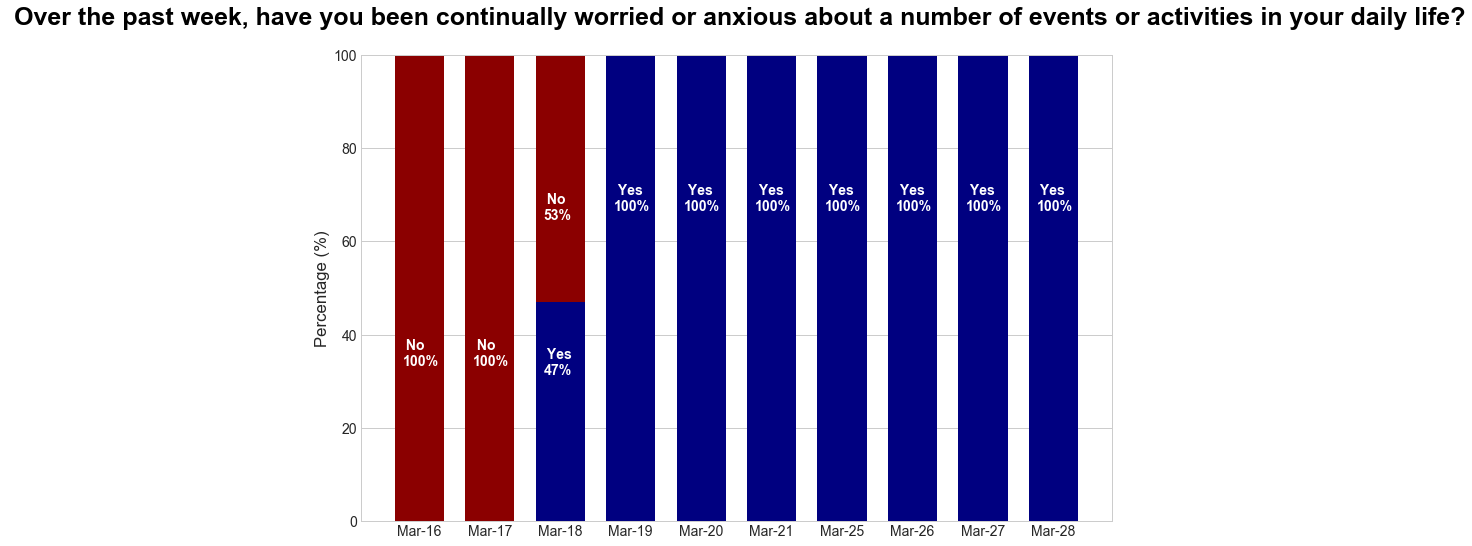

In [1002]:
#data.columns[7]
stackedbarchart(data,data.columns[7])
#ds = data.columns[7]
#data[ds].value_counts()

In [897]:
data = data.replace({'Rescheduled or canceled non-critical in-person gatherings and appointments (e.g. birthday parties, concerts, museums, annual checkups, spa, social dinners)':'Rescheduled or canceled non-critical in-person gatherings and appointments'})


data.iloc[0,12]


'Rescheduled or canceled non-critical in-person gatherings and appointments'

In [1008]:
incomelist = data['What is your annual household income?']
incomelist2 = []
for x in incomelist:
    x1 = str(x)
    x1 = x1.replace('Less than $25,000','<$25,000')
    x1 = x1.replace('Between $25,000 and $49,999','25,000-49,999')
    x1 = x1.replace('Between $50,000 and $74,999','50,000-74,999')
    x1 = x1.replace('Between $75,000 and $99,999','75,000-99,999')
    x1 = x1.replace('Between $100,000 and $124,999','100,000-124,999')
    x1 = x1.replace('Between $125,000 and $149,999','125,000-149,999')
    x1 = x1.replace('Between $150,000 and $199,000','>$150,000')
    x1 = x1.replace('More than $200,000','>$150,000')
    x1 = x1.replace('high_iii','>$150,000')
    x1 = x1.replace('high_ii','125,000-149,999')
    x1 = x1.replace('high_i','100,000-124,999')
    x1 = x1.replace('middle_ii','75,000-99,999')
    x1 = x1.replace('middle_i','50,000-74,999')
    x1 = x1.replace('lower_ii','25,000-49,999')
    x1 = x1.replace('lower_i','<$25,000')
    x1 = x1.replace('prefer_not_to_say','Prefer not to say')
    incomelist2.append(x1)
data['income_group'] = incomelist2
data.groupby('income_group').count()

,Source,TimeFinished,"On a scale of 1 to 10, how reasonable do you think the public reaction is to COVID-19 now? (1 is under-reacting and 10 is overreacting)","On a scale of 1 to 10, how much do you trust the government to respond to COVID-19 effectively? (1 is strongly distrust and 10 is strongly trust)","""COVID-19 has led me to drastically change my daily routines and the way I spend my day."" How much do you agree or disagree with this statement?",How many WEEKS do you think it'll take before your daily life returns to normal (like before COVID-19)?,"How are you doing financially today, compared to a year ago?","Over the past week, have you been continually worried or anxious about a number of events or activities in your daily life?","In the past 3 days, did you work from home (WFH)?","In the past 48 hours, I... (check all that apply)",...,Datetime,Day,Age,Age Groups,Female,Male,Student,Retired,Employed,Not Employed
income_group,,,,,,,,,,,,,,,,,,,,,
"100,000-124,999",25,25,25,25,25,25,21,21,25,1,...,25,25,25,25,25,25,25,25,25,25
"125,000-149,999",22,22,22,22,22,22,18,18,22,0,...,22,22,22,22,22,22,22,22,22,22
"25,000-49,999",50,50,50,50,50,50,27,27,50,5,...,50,50,50,50,50,50,50,50,50,50
"50,000-74,999",33,33,33,33,33,33,21,21,33,3,...,33,33,33,33,33,33,33,33,33,33
"75,000-99,999",46,46,46,46,46,46,27,27,46,4,...,46,46,46,46,46,46,46,46,46,46
"<$25,000",58,58,58,58,58,58,34,34,58,4,...,58,58,58,58,58,58,58,58,58,58
">$150,000",95,95,95,95,95,95,91,91,95,1,...,95,95,95,95,95,95,95,95,95,95
Prefer not to say,52,52,52,52,52,52,42,42,52,2,...,52,52,52,52,52,52,52,52,52,52
nan,127,127,127,127,127,127,0,0,127,7,...,127,127,127,127,127,127,127,127,127,127
